This notebook explores a mock dataset of stars, constellations, galaxies, and users. It demonstrates how I approach data analysis: cleaning, descriptive stats, inferential tests, and visualization — even in a science-inspired domain. Unlike my other projects, this project is focused on **statistics and analytical depth**.

This notebook will focus on **exploratory data analysis**.

First, import the necessary libraries and load the CSVs into dataframes.  Note that the CSVs that have already been cleaned up by `01_raw_data_cleanup.ipynb` are loaded.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

SOURCE_FOLDER = "../data/cleaned"
sns.set_theme(style="whitegrid", palette="deep")

df_stars = pd.read_csv(f"{SOURCE_FOLDER}/stars.csv")
df_constellations = pd.read_csv(f"{SOURCE_FOLDER}/constellations.csv")
df_galaxies = pd.read_csv(f"{SOURCE_FOLDER}/galaxies.csv")
df_users = pd.read_csv(f"{SOURCE_FOLDER}/users.csv")

Display some quick info about each dataframe.

In [35]:
names_of_dfs = [k for k in globals() if k.startswith("df_")]
for name in names_of_dfs:
    df = globals()[name]
    print(f"=== {name} ===")
    print(df.info())
    display(df.head(3))

=== df_stars ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   star_id             503 non-null    int64  
 1   star_name           503 non-null    object 
 2   star_type           503 non-null    object 
 3   constellation_id    503 non-null    int64  
 4   right_ascension     503 non-null    float64
 5   declination         503 non-null    float64
 6   apparent_magnitude  503 non-null    float64
 7   spectral_type       503 non-null    object 
 8   distance_mly        503 non-null    float64
 9   temperature_k       503 non-null    float64
 10  added_by            503 non-null    int64  
 11  verified_by         503 non-null    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 47.3+ KB
None


,star_id,star_name,star_type,constellation_id,right_ascension,declination,apparent_magnitude,spectral_type,distance_mly,temperature_k,added_by,verified_by
0,1,Star-00001,Giant,5,245.746,-64.486,3.705,M,577.651,2887.0,89,107
1,2,Star-00002,Main Sequence,362,318.097,-83.532,3.085,G,312.768,5608.0,77,110
2,3,Star-00003,Main Sequence,317,226.618,-26.443,1.641,G,26.122,5749.0,34,99


=== df_constellations ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   constellation_id    405 non-null    int64 
 1   constellation_name  405 non-null    object
 2   galaxy_id           405 non-null    int64 
 3   added_by            405 non-null    int64 
 4   verified_by         405 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.9+ KB
None


,constellation_id,constellation_name,galaxy_id,added_by,verified_by
0,1,Constellation-001,232,1,97
1,2,Constellation-002,341,18,98
2,3,Constellation-003,397,71,115


=== df_galaxies ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   galaxy_id     403 non-null    int64  
 1   galaxy_name   403 non-null    object 
 2   galaxy_type   403 non-null    object 
 3   distance_mly  403 non-null    float64
 4   redshift      403 non-null    float64
 5   mass_solar    403 non-null    int64  
 6   diameter_ly   403 non-null    int64  
 7   added_by      403 non-null    int64  
 8   verified_by   403 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 28.5+ KB
None


,galaxy_id,galaxy_name,galaxy_type,distance_mly,redshift,mass_solar,diameter_ly,added_by,verified_by
0,1,Galaxy-001,Spiral,317.044,58.0326,275596326285,114330,23,113
1,2,Galaxy-002,Irregular,6.726,0.4860,30715124530,10575,16,101
2,3,Galaxy-003,Spiral,3.460,3.0099,99131106087,82716,41,111


=== df_users ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        120 non-null    int64 
 1   username       120 non-null    object
 2   email          120 non-null    object
 3   password       120 non-null    object
 4   first_name     120 non-null    object
 5   last_name      120 non-null    object
 6   date_of_birth  120 non-null    object
dtypes: int64(1), object(6)
memory usage: 6.7+ KB
None


,user_id,username,email,password,first_name,last_name,date_of_birth
0,1,taylorkim,taylorkim@example.com,REDACTED,Taylor,Kim,1997-01-12
1,2,rileygray,rileygray@example.com,REDACTED,Riley,Gray,1997-11-28
2,3,jamiejames,jamiejames@example.com,REDACTED,Jamie,James,2000-03-18


Create some histograms on the data.

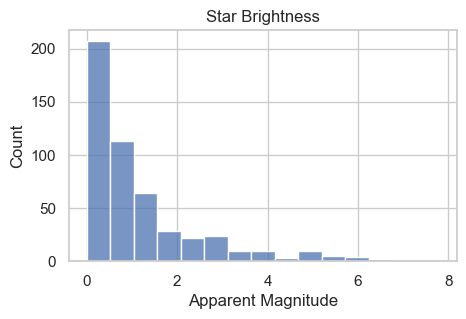

In [36]:
plt.figure(figsize=(5, 3))
sns.histplot(df_stars["apparent_magnitude"], bins=15)
plt.title("Star Brightness")
plt.xlabel("Apparent Magnitude")
plt.ylabel("Count")
plt.show()

Above is a histogram for **Star Brightness**.  The lower the apparent magnitude of the star, the brighter it is.  The **stars** dataset thus contains mostly bright stars.  

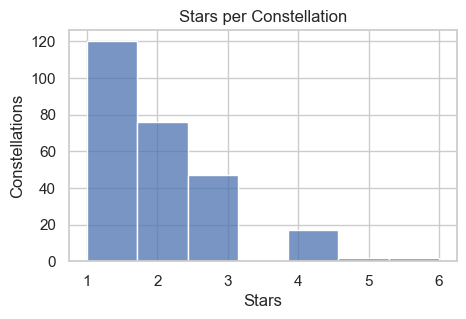

In [37]:
stars_per_const = df_stars.groupby("constellation_id").size().reset_index(name="count")
plt.figure(figsize=(5, 3))
sns.histplot(stars_per_const["count"], bins=7)
plt.title("Stars per Constellation")
plt.xlabel("Stars")
plt.ylabel("Constellations")
plt.show()

Above is a histogram for **Stars per Constellation**.  Note that even though I had specified that the constellations be distributed into 7 "bins", the chart only found 6.  The **constellations** dataset thus has constellations that have at most 6 stars that exist in the **stars** dataset.

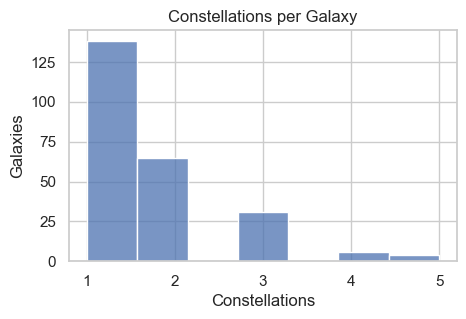

In [38]:
consts_per_gal = df_constellations.groupby("galaxy_id").size().reset_index(name="count")
plt.figure(figsize=(5, 3))
sns.histplot(consts_per_gal["count"], bins=7)
plt.title("Constellations per Galaxy")
plt.xlabel("Constellations")
plt.ylabel("Galaxies")
plt.show()

Above is a histogram for **Constellations per Galaxy**.  Note that even though I had specified that the galaxies be distributed into 7 "bins", the chart only found 5.  The **galaxies** dataset thus has galaxies that have at most 5 constellations that exist in the **constellations** dataset.

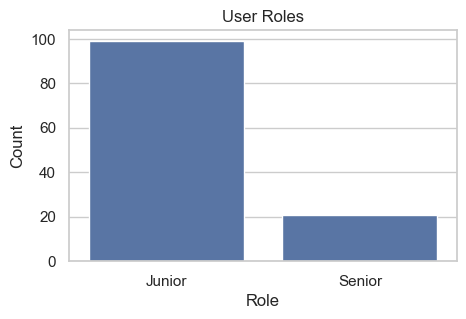

In [39]:
df_users["role"] = df_users["date_of_birth"].apply(lambda dob: "Junior" if int(dob[:4]) >= 1995 else "Senior")

plt.figure(figsize=(5, 3))
sns.countplot(data=df_users, x="role")
plt.title("User Roles")
plt.xlabel("Role")
plt.ylabel("Count")
plt.show()

Above is a count plot for **User Roles**.  For simplicity, users are categorized as *Junior* for those 30 years old and younger, and *Senior* for everybody else.  The **users** dataset thus has many more *Junior*s than *Senior*s.